# Data Preprocessing


### Libarary and Imports

In [ ]:
# Load Libraries
import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn import preprocessing
from gensim.models import Word2Vec
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# read data
from google.colab import drive
drive.mount('/content/drive')
# Daniel's
train = pd.read_csv("/content/train.csv")
#pet_predict = pd.read_csv("/content/pet_predictions.csv")
#breeds_labels = pd.read_csv("/content/breed_labels.csv")

Mounted at /content/drive


In [ ]:
# get a summary of data
train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


## Machine Learning Models


## Feature Engineering

### Age * Type Interaction

In [ ]:
train['age_type_interaction'] = train['Age'] * train['Type']

### Changing 'AdoptionSpeed' to Binary

In [ ]:
# Assign 0 to "Not Adopted" and 1 to "Adopted"
train['AdoptionStatus'] = train['AdoptionSpeed'].apply(lambda x: 0 if x == 4 else 1)

# Separate samples for each label within the "Adopted" class
adopted_label_1 = train[train['AdoptionSpeed'] == 1]
adopted_label_2 = train[train['AdoptionSpeed'] == 2]
adopted_label_3 = train[train['AdoptionSpeed'] == 3]
adopted_label_4 = train[train['AdoptionSpeed'] == 4]

# Sample an equal number of "Not Adopted" samples for each label within the "Adopted" class
not_adopted_samples = train[train['AdoptionStatus'] == 0]
adopted_downsampled_label_1 = resample(adopted_label_1,
                                       replace=False,
                                       n_samples=len(adopted_label_1),
                                       random_state=42)
adopted_downsampled_label_2 = resample(adopted_label_2,
                                       replace=False,
                                       n_samples=len(adopted_label_2),
                                       random_state=42)
adopted_downsampled_label_3 = resample(adopted_label_3,
                                       replace=False,
                                       n_samples=len(adopted_label_3),
                                       random_state=42)
adopted_downsampled_label_4 = resample(adopted_label_4,
                                       replace=False,
                                       n_samples=len(adopted_label_4),
                                       random_state=42)

# Concatenate the downsampled adopted samples with the not adopted samples
balanced_df = pd.concat([adopted_downsampled_label_1,
                         adopted_downsampled_label_2,
                         adopted_downsampled_label_3,
                         adopted_downsampled_label_4,
                         not_adopted_samples])

# Shuffle the dataset
train = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,age_type_interaction,AdoptionStatus
0,1,Panda,30,205,0,2,7,0,0,1,...,500,41326,eef145eefa54d9f08c44217170f9560a,0,Panda is a rare Shih Tzu breed that I adopted ...,b7351540f,5.0,3,30,1
1,1,Creamy,72,109,0,2,3,5,0,3,...,0,41326,3b074cadd2350de62dca7056b9bab6f4,0,FOR serious adopters only! Requirements for Ad...,1751240fe,0.0,4,72,0
2,2,NaN,12,299,0,1,3,4,0,2,...,0,41326,d8af7afece71334473575c9f70daf00d,0,"Found at Astaka Field, Pj on 28 May . Will be ...",d1938a57f,1.0,1,24,1
3,2,Rio,8,266,0,1,1,7,0,2,...,0,41326,b9ee99b79d382106af36eba5d362c364,0,He's a very playful and loyal cat. Can be a ve...,b13db9ce8,4.0,1,16,1
4,2,NaN,24,266,299,2,1,2,6,2,...,160,41326,2a6ced77b804df242172dbcc444394d6,0,very active and playful personality cat. atten...,4dd89c859,1.0,4,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18775,2,Meme,12,266,266,2,1,7,0,2,...,180,41401,27083c7f0a040994ca84395f4b17d80b,0,Meme is a very friendly and well behave cat~ M...,ee63ca0b4,2.0,4,24,0
18776,2,Sudu,7,299,0,1,1,6,7,1,...,100,41326,525435aafa7bf23c9118850d388ff80c,0,"Sudu is sweet, petite loving tabby boy who was...",00eca0391,5.0,4,14,0
18777,1,Bailey,2,307,0,1,2,0,0,2,...,0,41326,7a22a977b447e38f94017409294d1932,0,"Hello, my name is Bailey and I'm a mongrel. I'...",e1d40ecc1,1.0,2,2,1
18778,1,Jack Russell Terier For Adoption!,1,128,129,3,1,2,7,1,...,0,41401,eaaf22c28570200164914648fdbb9e2e,0,These are the children of a female Jack Russel...,fa1d3af33,2.0,1,1,1


In [ ]:
print(train['AdoptionStatus'].value_counts())

AdoptionStatus
1    10386
0     8394
Name: count, dtype: int64


AdoptionSpeed
4    8394
2    4037
3    3259
1    3090
Name: count, dtype: int64
AdoptionStatus
1    10386
0     8394
Name: count, dtype: int64


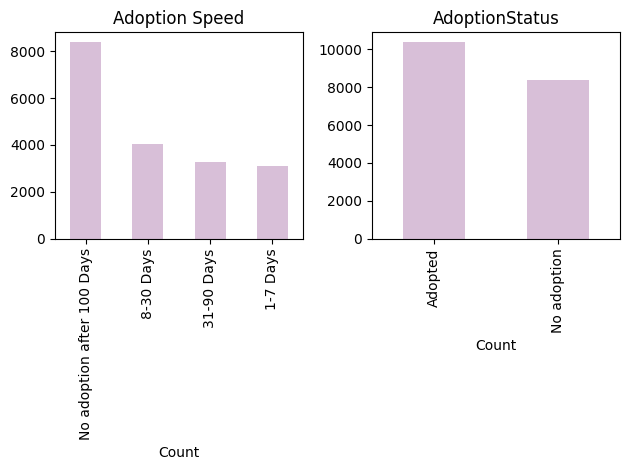

In [ ]:
# display adoption speed graph
plt.subplot(1, 2, 1)
train['AdoptionSpeed'].value_counts().rename(
    {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}).plot(kind='bar', color='thistle')
plt.title('Adoption Speed')
plt.xlabel('Count')
print(train['AdoptionSpeed'].value_counts())

# display adoption speed graph
plt.subplot(1, 2, 2)
train['AdoptionStatus'].value_counts().rename(
    {0:'No adoption',
     1:'Adopted'}).plot(kind='bar', color='thistle')
plt.title('AdoptionStatus')
plt.xlabel('Count')
print(train['AdoptionStatus'].value_counts())

# minimize overlap
plt.tight_layout()

### Preprocessing 'Description' Variable

In [ ]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    lst_text = text.split()
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    text = " ".join(lst_text)
    return text

lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
train["Description"] = train["Description"].apply(lambda x:
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True,
          lst_stopwords=lst_stopwords))

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,age_type_interaction,AdoptionStatus
0,1,Panda,30,205,0,2,7,0,0,1,...,500,41326,eef145eefa54d9f08c44217170f9560a,0,panda rare shih tzu breed adopted 2years ago h...,b7351540f,5.0,3,30,1
1,1,Creamy,72,109,0,2,3,5,0,3,...,0,41326,3b074cadd2350de62dca7056b9bab6f4,0,serious adopter requirement adoption adoption ...,1751240fe,0.0,4,72,0
2,2,NaN,12,299,0,1,3,4,0,2,...,0,41326,d8af7afece71334473575c9f70daf00d,0,found astaka field pj 28 may put adoption clai...,d1938a57f,1.0,1,24,1
3,2,Rio,8,266,0,1,1,7,0,2,...,0,41326,b9ee99b79d382106af36eba5d362c364,0,he playful loyal cat good companion home frien...,b13db9ce8,4.0,1,16,1
4,2,NaN,24,266,299,2,1,2,6,2,...,160,41326,2a6ced77b804df242172dbcc444394d6,0,active playful personality cat attention seeki...,4dd89c859,1.0,4,48,0


In [ ]:
def count_words(text):
    return len(text.split())
train['Word_Count'] = train['Description'].apply(lambda x: count_words(x))
print(train.head())

   Type    Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     1   Panda   30     205       0       2       7       0       0   
1     1  Creamy   72     109       0       2       3       5       0   
2     2     NaN   12     299       0       1       3       4       0   
3     2     Rio    8     266       0       1       1       7       0   
4     2     NaN   24     266     299       2       1       2       6   

   MaturitySize  ...  State                         RescuerID  VideoAmt  \
0             1  ...  41326  eef145eefa54d9f08c44217170f9560a         0   
1             3  ...  41326  3b074cadd2350de62dca7056b9bab6f4         0   
2             2  ...  41326  d8af7afece71334473575c9f70daf00d         0   
3             2  ...  41326  b9ee99b79d382106af36eba5d362c364         0   
4             2  ...  41326  2a6ced77b804df242172dbcc444394d6         0   

                                         Description      PetID  PhotoAmt  \
0  panda rare shih tzu breed adopted 2y

In [ ]:
# Finding the distribution of word_count
#statistics = train['Word_Count'].describe()
#print(statistics)

### Word2Vec

In [ ]:
#from gensim.models import Word2Vec

# Train a Word2Vec model
#model = Word2Vec(sentences=train['Description'], vector_size=100, window=5, min_count=2, workers=4)

# Save the model for later use
#model.save("Word2Vec.model")

# Pad or truncate word vectors to ensure consistency
#word_vectors_padded = pad_sequences(word_vectors, maxlen=35, dtype='float32', padding='post')

#train['word2vec_features'] = word_vectors_padded.tolist()

In [ ]:
# Function to convert a document to a vector
#def document_to_vec(words, model):
    # Remove out-of-vocabulary words
#    words = [word for word in words if word in model.wv.key_to_index]
#    if len(words) >= 1:
#        return np.mean(model.wv[words], axis=0)
#    else:
#        return []

# Vectorize each description
#train['vec'] = train['Description'].apply(lambda x: document_to_vec(x, model))


In [ ]:
# Assuming all vectors are of the same length, for example, 100 dimensions
#vectorized_df = pd.DataFrame(train['vec'].tolist(), index=train.index)
#vectorized_df

In [ ]:
#train['average_vectors'] = vectorized_df.mean(axis=1)

In [ ]:
# Assuming you have other features stored in a DataFrame called `other_features_df`
# Concatenate the vectorized descriptions with the other features
# train = pd.concat([vectorized_df, train], axis=1)

In [ ]:
#train

### TextBlob

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

# Apply the function to your DataFrame
train['Description_Score'] = train['Description'].apply(calculate_sentiment)

# Quick look at the new column
print(train[['Description', 'Description_Score']].head())

                                         Description  Description_Score
0  panda rare shih tzu breed adopted 2years ago h...           0.085417
1  serious adopter requirement adoption adoption ...          -0.250000
2  found astaka field pj 28 may put adoption clai...           0.000000
3  he playful loyal cat good companion home frien...           0.469444
4  active playful personality cat attention seeki...          -0.133333


In [ ]:
train

### Inserting deep learning predictions
(Put it here before splitting train and test because we need to use petID to match and merge the dataset)
(We will use this train_dl at the bottom part of the notebook)

In [ ]:
# Merge the prediction results with the train dataset based on 'petID'
train_dl = train.merge(pet_predict, on='petID', how='left')

# Insert the predicted 'AdoptionStatus' values into a new column called 'dl_prediction'
train_dl['dl_prediction'] = train_dl['AdoptionStatus_y']

# Drop the original 'AdoptionStatus_y' column
train_dl = train_dl.drop('AdoptionStatus_y', axis=1)

# Rename the 'AdoptionStatus_x' column to 'AdoptionStatus'
train_dl = train_dl.rename(columns={'AdoptionStatus_x': 'AdoptionStatus'})

### Splitting Train & Test

In [ ]:
train = train.dropna()

In [ ]:
drop = ['Name', 'Breed2', 'Color2','Color3', 'RescuerID', 'PetID', 'Description', 'AdoptionSpeed']
train = train.drop(drop, axis = 1)
X = train.drop(['AdoptionStatus'], axis = 1)
y = train.AdoptionStatus

#Train-Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=0)

# confirm split
print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', ytest.shape)

Training Features Shape: (13684, 19)
Training Labels Shape: (13684,)
Testing Features Shape: (3422, 19)
Testing Labels Shape: (3422,)


## Approach one - KNeighborsClassifier


In [ ]:
Xtrain.columns = Xtrain.columns.astype(str)
Xtest.columns = Xtest.columns.astype(str)

# Choose a class of model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training data
knn.fit(Xtrain, ytrain)

# Test it on test data
y_pred_knn = knn.predict(Xtest)

# accuracy score
train_accuracy_knn = knn.score(Xtrain, ytrain)
test_accuracy_knn = accuracy_score(ytest, y_pred_knn)
print("KNeighbors Classifier train accuracy: {:.2f}%".format(train_accuracy_knn * 100))
print("KNeighbors Classifier test accuracy: {:.2f}%".format(test_accuracy_knn * 100))

KNeighbors Classifier train accuracy: 86.31%
KNeighbors Classifier test accuracy: 66.66%


## Logsistical Regression

In [ ]:
# encode categorical data and create pipeline for automating the process for new data
# Need to put missing features
numeric_features = ['Age','Fee','VideoAmt','PhotoAmt','Quantity', 'Description_Score', 'age_type_interaction']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Type','Gender','MaturitySize','FurLength','Vaccinated',
                        'Dewormed','Sterilized','Health','Breed1','Color1', 'Word_Count']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# instantiate model
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier',
                   LogisticRegression(solver='lbfgs', multi_class='auto',max_iter = 15000))])


# fit model to data
model_lr.fit(Xtrain,ytrain)

# Make predictions on test data
y_model_lr = model_lr.predict(Xtest)

# accuracy score
train_accuracy_lr = model_lr.score(Xtrain, ytrain)
test_accuracy_lr = model_lr.score(ytest, ytest)
print("Logistic Regression train accuracy: {:.2f}%".format(train_accuracy_lr * 100))
print("Logistic Regression test accuracy: {:.2f}%".format(test_accuracy_lr * 100))

Logistic Regression train accuracy: 67.91%
Logistic Regression test accuracy: 66.63%


## RandomForest

In [ ]:
base_model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier',
                   RandomForestClassifier(n_jobs=-1, n_estimators=300)
                     )])
base_model_rf.fit(Xtrain,ytrain)

# make predictions on test data
y_pred_rf = base_model_rf.predict(Xtest)

# accuracy score
train_accuracy_rf = base_model_rf.score(Xtrain, ytrain)
test_accuracy_rf = accuracy_score(ytest, y_pred_rf)
print("Random Forest train accuracy: {:.2f}%".format(train_accuracy_rf * 100))
print("Random Forest test accuracy: {:.2f}%".format(test_accuracy_rf * 100))

Random Forest train accuracy: 99.98%
Random Forest test accuracy: 86.91%


#### Based on the graph, it appears that the decision has been made to select 150 as the number of estimators (n_estimators) for the RandomForestClassifier. This choice seems to strike a balance between a good score and computational efficiency.

## Hyperparamter Tuning

#### Option 1: Improve result using grid search and cross validation(Take some time)



In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [120, 140, 150, 160],
    'max_features': [3, 4, 5, 'sqrt'],  # 'sqrt' corresponds to sqrt(n_features)
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}


# Create a Random Forest classifier
rf = RandomForestClassifier()

# Instantiate the grid search model with 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(Xtrain, ytrain)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model from the grid search
best_htrf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_htrf = best_htrf_model.predict(Xtest)

train_accuracy_htrf = best_htrf_model.score(Xtrain, ytrain)
test_accuracy_htrf = accuracy_score(ytest, y_pred_htrf)

# accuracy
print("Random Forest Hyperparameter tuned train accuracy: {:.2f}%".format(train_accuracy_htrf * 100))
print("Random Forest Hyperparameter tuned test accuracy: {:.2f}%".format(test_accuracy_htrf * 100))

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


KeyboardInterrupt: 

#### Option2: Running with best hyperparamters(Save Time)

In [ ]:
best_params = {
    'bootstrap': True,
    'max_depth': 150,
    'max_features': 5,
    'min_samples_leaf': 3,
    'min_samples_split': 8,
    'n_estimators': 300
}

best_htrf_model = RandomForestClassifier(**best_params)


# Fit the grid search to the training data
best_htrf_model.fit(Xtrain, ytrain)

# Evaluate the best model on the test set
y_pred_htrf = best_htrf_model.predict(Xtest)

train_accuracy_htrf = best_htrf_model.score(Xtrain, ytrain)
test_accuracy_htrf = accuracy_score(ytest, y_pred_htrf)

# accuracy
print("Random Forest Hyperparameter tuned train accuracy: {:.2f}%".format(train_accuracy_htrf * 100))
print("Random Forest Hyperparameter tuned test accuracy: {:.2f}%".format(test_accuracy_htrf * 100))

Random Forest Hyperparameter tuned train accuracy: 95.75%
Random Forest Hyperparameter tuned test accuracy: 80.98%


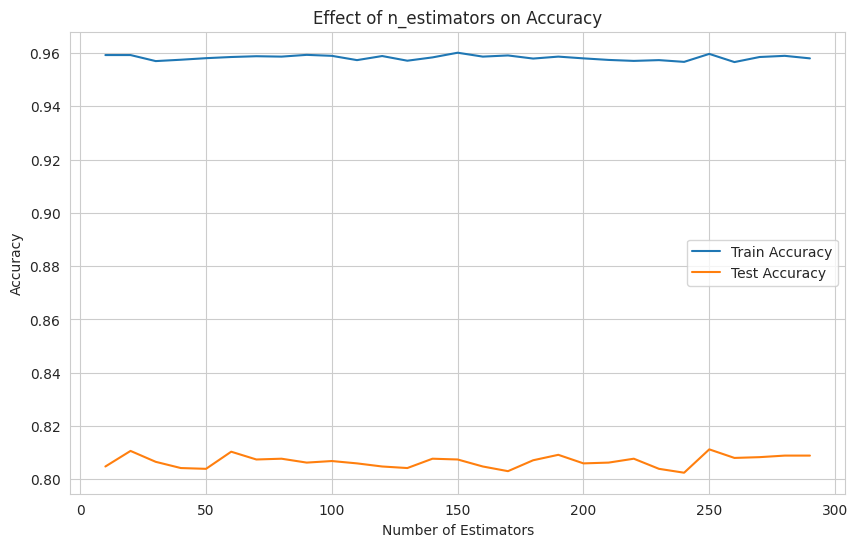

In [ ]:
estimators = np.arange(10, 300, 10)  # Generating an array of values from 10 to 290 in steps of 10.
train_scores = []
test_scores = []

for n in estimators:

    # Fit the model to the training data
    best_htrf_model.fit(Xtrain, ytrain)

    # Calculate training accuracy
    train_score = best_htrf_model.score(Xtrain, ytrain)
    train_scores.append(train_score)

    # Calculate test accuracy
    test_score = best_htrf_model.score(Xtest, ytest)
    test_scores.append(test_score)

# Plotting the effect of n_estimators on the scores
plt.figure(figsize=(10, 6))
plt.plot(estimators, train_scores, label='Train Accuracy')
plt.plot(estimators, test_scores, label='Test Accuracy')
plt.title("Effect of n_estimators on Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Stacked Model

In [ ]:
from sklearn.model_selection import cross_val_predict
# Generate predictions using the trained model
train_preds = cross_val_predict(best_htrf_model, Xtrain, ytrain, cv=5, method='predict_proba')
test_preds = best_htrf_model.predict_proba(Xtest)

# Stack the predictions along with original features (if available)
X_train_stacked = np.column_stack((Xtrain, train_preds[:, 1]))
X_test_stacked = np.column_stack((Xtest, test_preds[:, 1]))

# Train a meta-model using the stacked predictions and original features
meta_model = RandomForestClassifier()
meta_model.fit(X_train_stacked, ytrain)

# Make predictions on the test set using the meta-model
y_pred_stacked = meta_model.predict(X_test_stacked)

accuracy_stacked = accuracy_score(ytest, y_pred_stacked)
print("Stacked Model Accuracy:", accuracy_stacked)

Stacked Model Accuracy: 0.8445353594389247


## Evaluation


#### Feature importances are typically computed as the average reduction in impurity that is brought by that feature across all the trees in the forest.

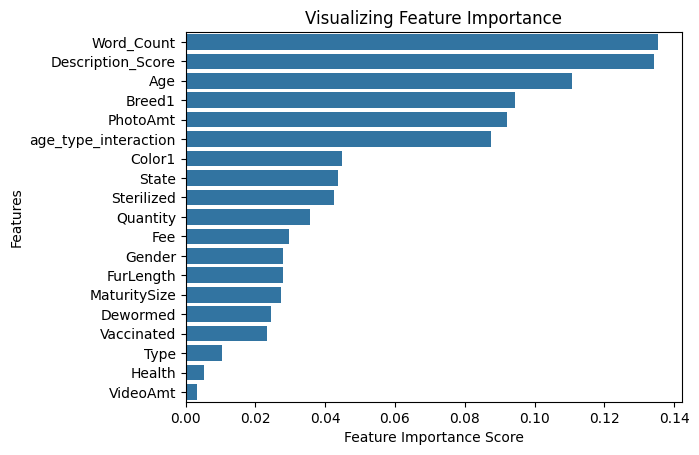

In [ ]:
feature_imp = pd.Series(best_htrf_model.feature_importances_,index=X.columns).sort_values(ascending=False) #creates a Series mapping each feature to its importance score as determined by the random forest model.
feature_imp
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Feature Importance")
plt.show()

### Top 5 features


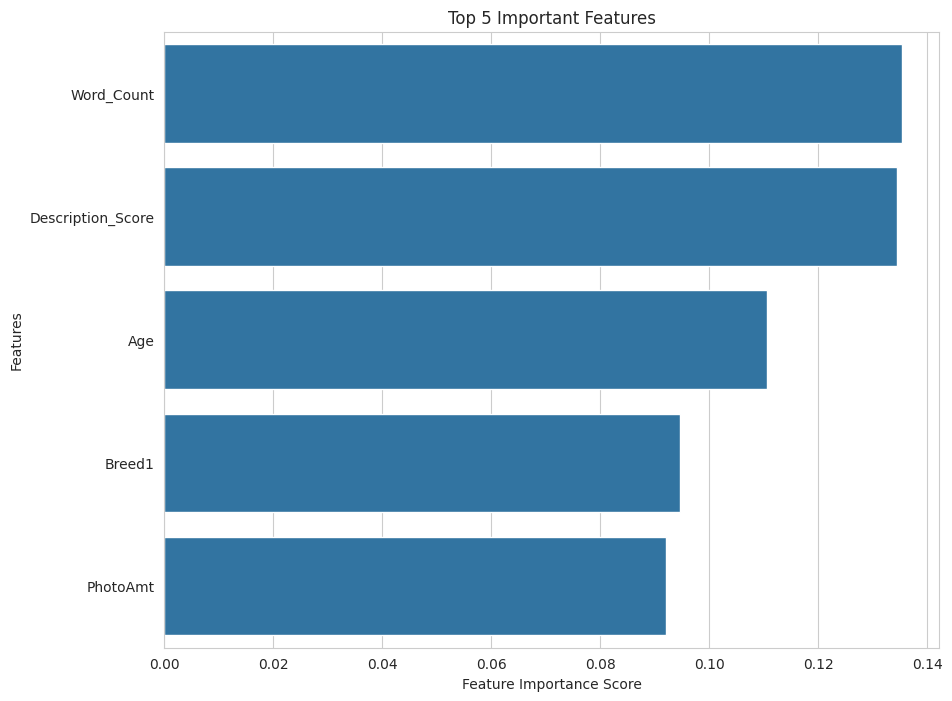

In [ ]:
top_10_features = feature_imp[:5]
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.barplot(x=top_10_features, y=top_10_features.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top 5 Important Features")
plt.show()

### Performance Metrics

Due to the simplicity of the data, which used to be multi-class, the results could be due to trivial data (classification model was 78% testing accuracy)

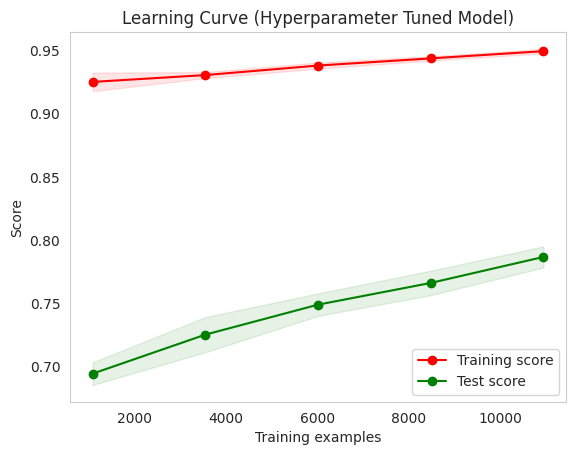

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimator, X_train, y_train, X_test, y_test, title=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    if title is not None:
        plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt


# Plot learning curve for hyperparameter tuned model
plot_learning_curve(best_htrf_model, Xtrain, ytrain, Xtest, ytest, cv=5, title="Learning Curve (Hyperparameter Tuned Model)")
plt.show()

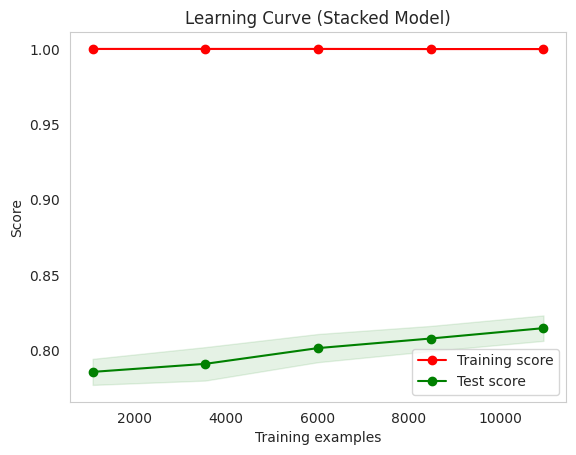

In [ ]:
# Plot learning curve for stacked model
plot_learning_curve(meta_model, X_train_stacked, ytrain, X_test_stacked, y_pred_stacked, cv=5, title="Learning Curve (Stacked Model)")
plt.show()

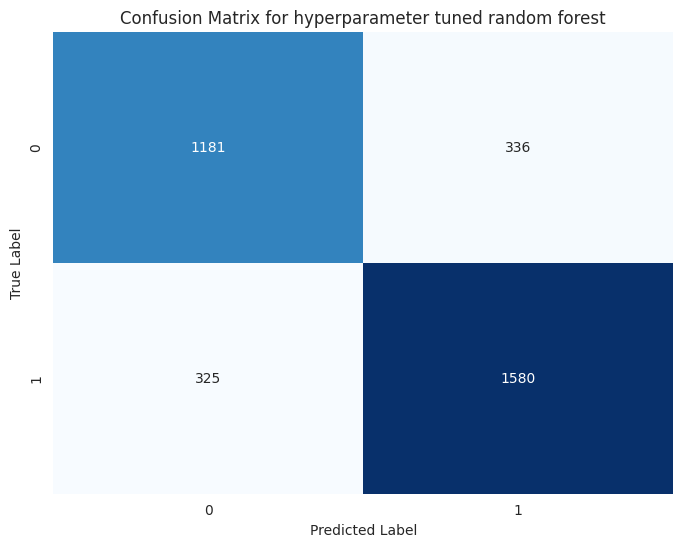

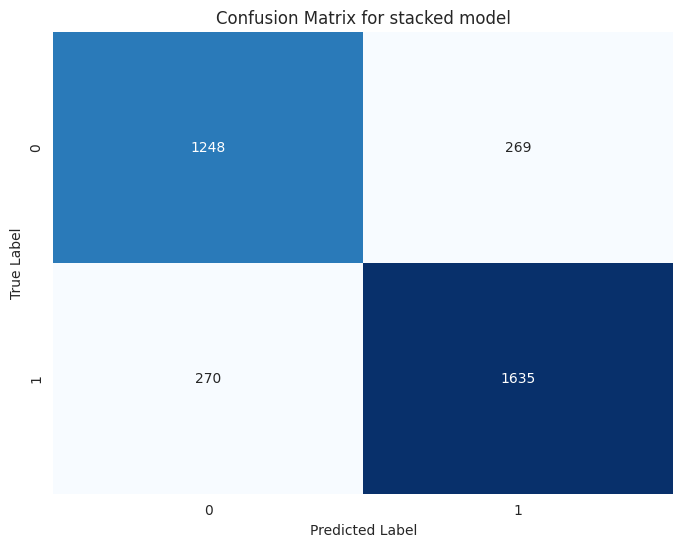

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred_htrf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for hyperparameter tuned random forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred_stacked)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for stacked model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()